# **- FedEx Logistics Performance Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Krushna Ranjan Pradhan **


# 📦 FedEx Logistics Capstone Project Summary

## 🔍 Business Context

FedEx Logistics operates a complex global supply chain, handling shipments across regions, countries, and industries. With the rise of eCommerce and global distribution, efficient logistics are essential for maintaining a competitive edge. This project explores operational data to identify delays, cost inefficiencies, and performance bottlenecks.

The dataset includes information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and detailed product data. The objective is to derive actionable insights to optimize logistics operations, improve delivery timelines, and reduce costs.

---

## 📈 Key Insights

• Air is the most used and most reliable mode of shipment, followed by Truck. "Air Charter" is the least reliable shipment mode with the highest rate of late deliveries.

• South Africa had the highest number of total deliveries, indicating strong logistics activity there. Vietnam showed the best on-time delivery performance, suggesting an efficient supply chain system.

• Vendor INCO Terms have a clear impact on delivery performance — certain terms consistently lead to better on-time percentages, suggesting a need for evaluating and standardizing contractual terms.

• Countries with over 500 deliveries showed significant variation in delivery performance, which highlights where operational improvements could be focused.

• Statistical testing (Mann-Whitney U Test) revealed that the time difference between PO sent date and scheduled delivery date significantly affects whether a delivery is on time. Delayed deliveries tend to have longer planned durations.

• There is a moderately strong positive correlation (~0.6) between shipment weight and line item insurance cost, suggesting insurance pricing is influenced by shipment size.

• Data quality issues like inconsistent date formats, missing values in important fields (e.g., Dosage, Freight Cost), and categorical inconsistencies (e.g., spacing, case) were addressed to ensure analysis accuracy.

• Group-level analysis (by "Managed By" and "Country") revealed operational differences across teams and regions, helping identify high and low performing units.



---

## ✅ Conclusion

By identifying key bottlenecks and performance factors, this analysis supports FedEx Logistics in optimizing supply chain operations. Focusing on transport modes, regional strategies, and vendor agreements can lead to better delivery performance and cost savings—benefiting both the company and its customers.


# **GitHub Link -**

https://github.com/Krushna2024/FedEx-EDA.git

---

# **Problem Statement**


The central problem is:  
**"How can FedEx Logistics optimize its shipment and delivery processes to reduce delays, minimize freight costs, and improve overall supply chain performance?"**

This project aims to analyze operational shipment data to identify key factors contributing to delivery delays, understand the impact of shipment modes and vendor agreements, and uncover patterns that can help improve logistical efficiency and customer satisfaction.


#### **Define Your Business Objective?**

## 🎯 Business Objective

The primary business objective of this project is to **enhance the efficiency and reliability of FedEx Logistics' global supply chain operations**. This involves:

- **Reducing delivery delays** by identifying key bottlenecks in the shipment lifecycle.
- **Minimizing freight and logistics costs** by evaluating the impact of shipment modes, vendor agreements (INCO terms), and regional differences.
- **Improving on-time delivery performance** through data-driven recommendations on shipping practices, vendor selection, and transport methods.
- **Supporting better decision-making** for supply chain planning, with actionable insights from historical data.

Achieving these goals will help FedEx Logistics maintain a competitive edge in the rapidly evolving global logistics industry while delivering greater value to its customers.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [229]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import scipy.stats as stats

print("All packages imported successfully!")

All packages imported successfully!


### Dataset Loading

In [231]:
# Load Dataset
dataset = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
df = dataset.copy()

### Dataset First View

In [232]:
# Dataset First Look
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [233]:
# Dataset Rows & Columns count
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 10324, Columns: 33


### Dataset Information

In [234]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [235]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows in the dataset: {duplicate_count}")

Total duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [236]:
# Missing Values/Null Values Count (only the N/A values will be counted)
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


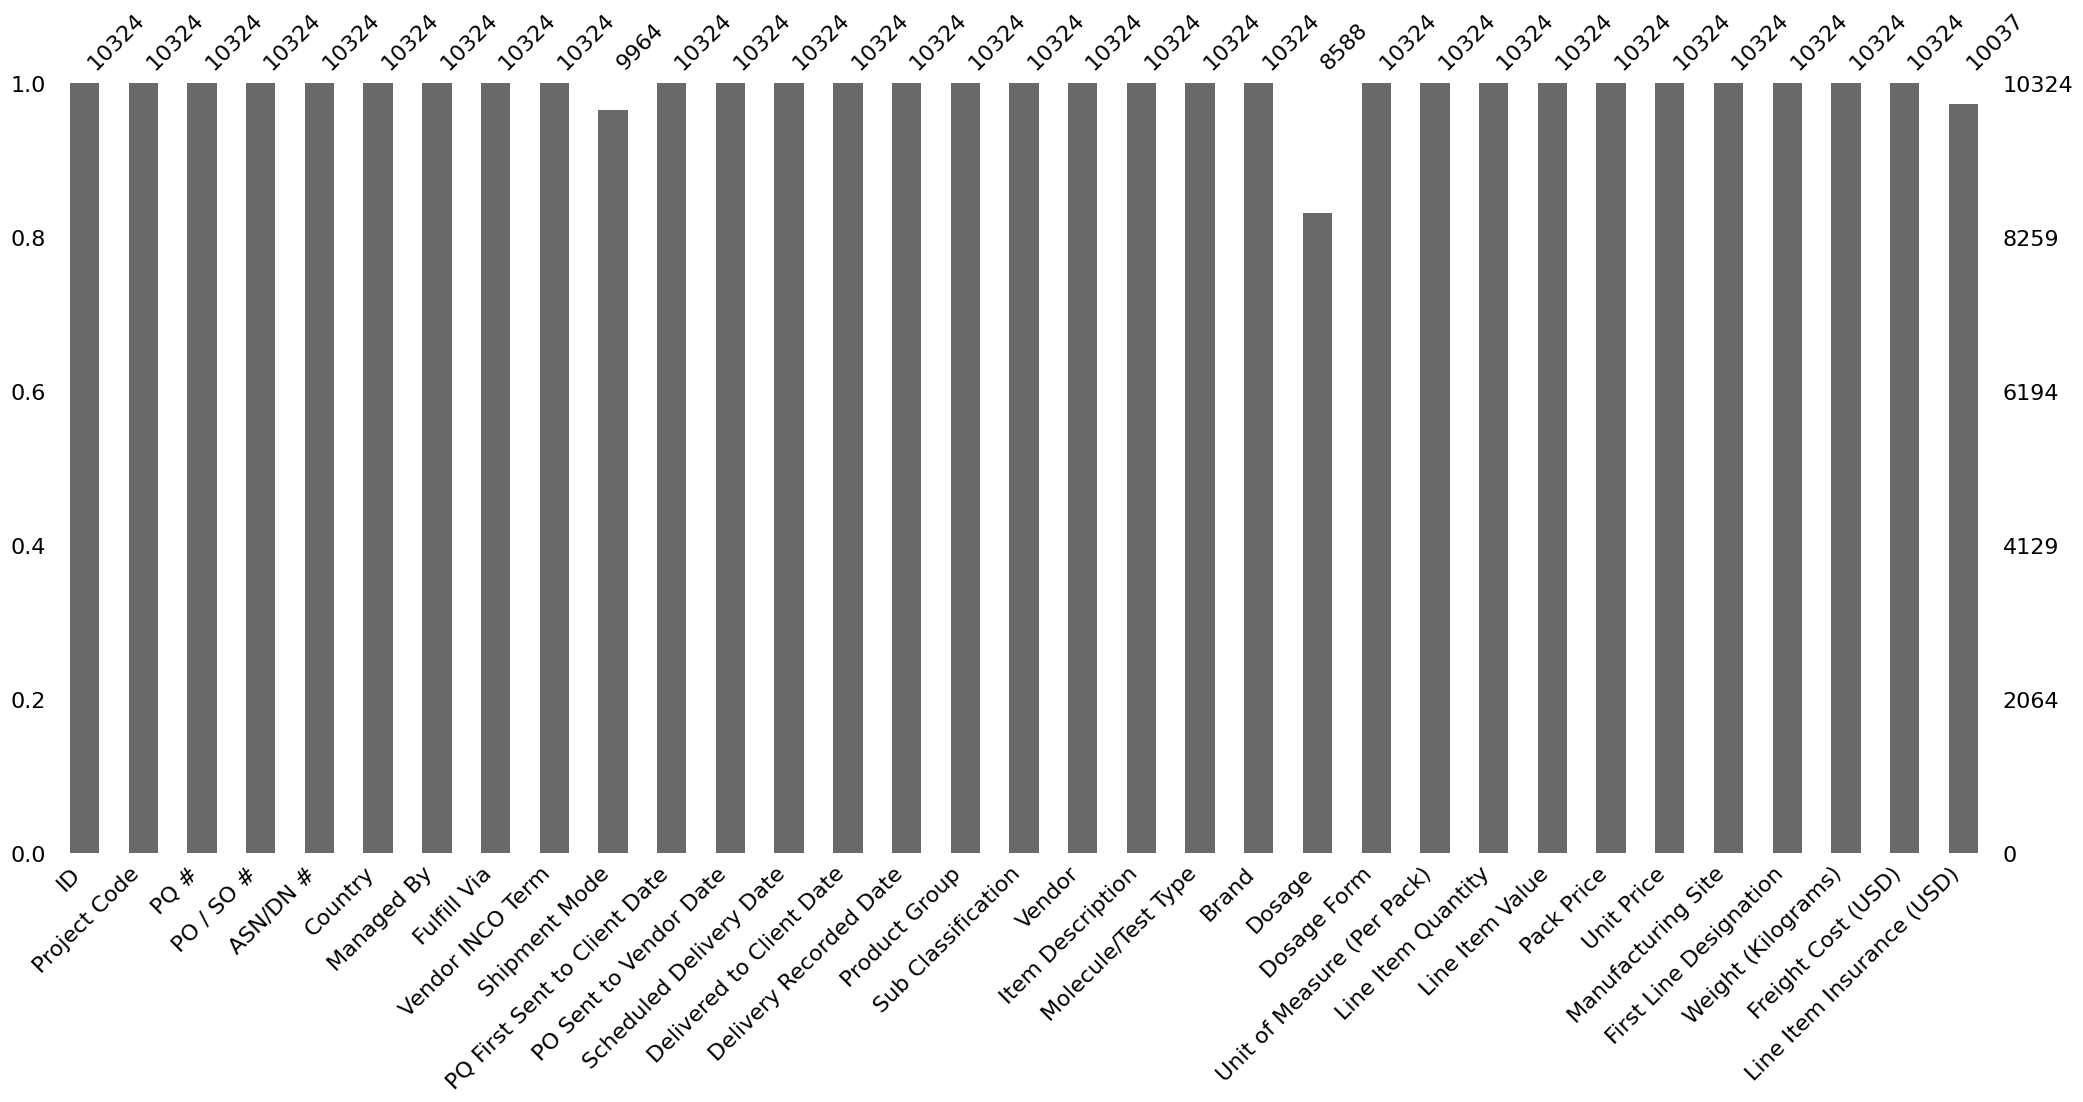

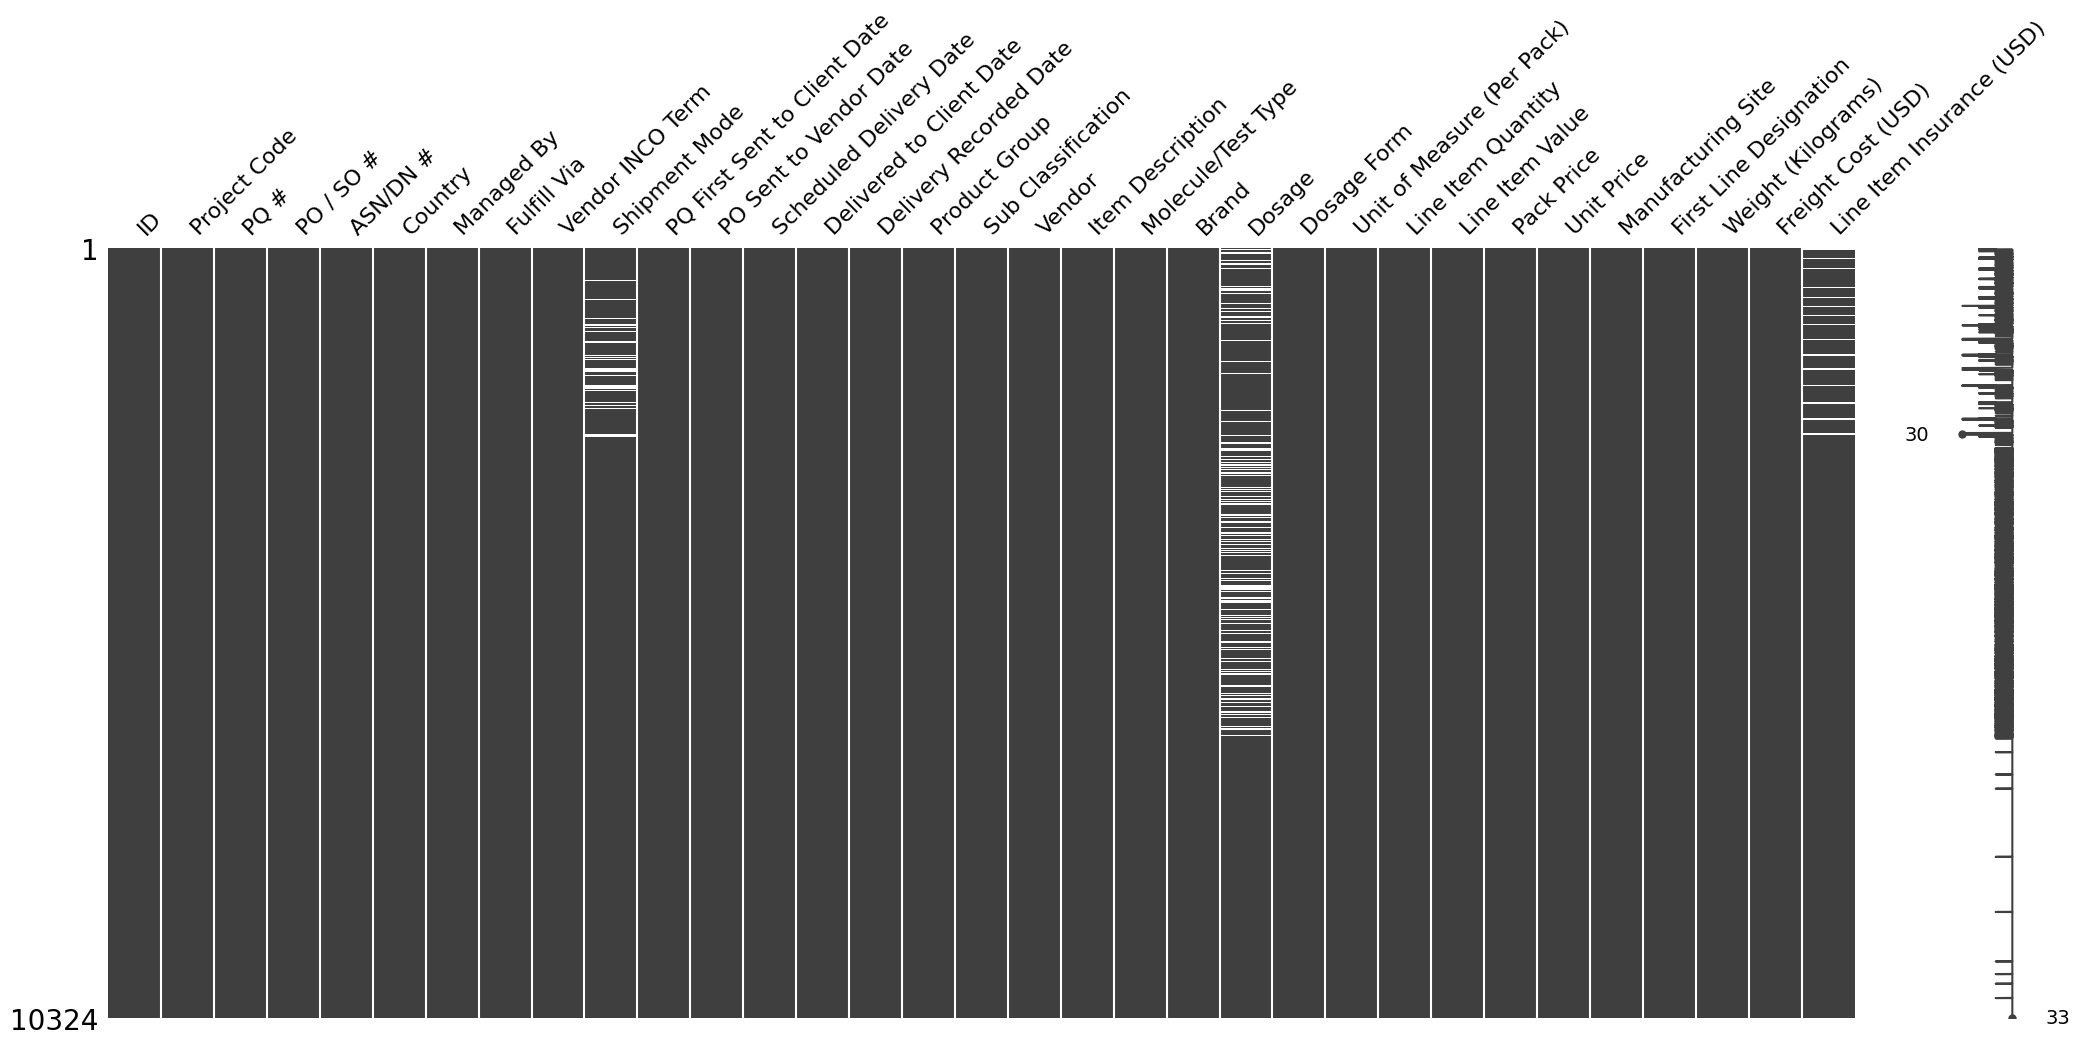

In [237]:
# Visualizing the missing values
# Bar chart of missing values
msno.bar(df)
plt.show()

# Matrix visualization of missing values
msno.matrix(df)
plt.show()

### What did you know about your dataset?

Dataset has zero duplicated values and missing values in 3 columns.

## ***2. Understanding Your Variables***

In [238]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [239]:
# Dataset Describe
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description

### 🔗 Supply Chain & Order Management
- **'PO / SO #'**, **'PQ #'**, **'ASN/DN #'**  
  These are unique identifiers related to purchase orders (PO), sales orders (SO), product quotations (PQ), and advance shipment notices (ASN) or delivery notes (DN). These help track transactions and shipments.

- **'Project Code'**, **'ID'**  
  Indicates that shipments may be part of specific projects, possibly linked to larger client contracts or internal tracking.

### 📅 Timeline Tracking
- **'PQ First Sent to Client Date'**, **'PO Sent to Vendor Date'**,  
  **'Scheduled Delivery Date'**, **'Delivered to Client Date'**, **'Delivery Recorded Date'**  
  These columns provide a timeline of the logistics process—starting from when a quotation is sent to when delivery is completed and recorded. These will help in calculating delays and turnaround times.

### 🌍 Shipping & Logistics
- **'Country'**, **'Managed By'**, **'Fulfill Via'**, **'Vendor INCO Term'**, **'Shipment Mode'**  
  These describe the geographical scope and logistics methods. For example, INCO terms specify the division of responsibilities and risks between buyers and sellers in international trade.

### 📦 Product Details
- **'Product Group'**, **'Sub Classification'**, **'Item Description'**,  
  **'Molecule/Test Type'**, **'Brand'**, **'Dosage'**, **'Dosage Form'**  
  These columns point to the pharmaceutical nature of the products being shipped—likely medicines or test kits.

### 📊 Quantitative & Financial Metrics
- **'Unit of Measure (Per Pack)'**, **'Line Item Quantity'**, **'Line Item Value'**,  
  **'Pack Price'**, **'Unit Price'**, **'Weight (Kilograms)'**,  
  **'Freight Cost (USD)'**, **'Line Item Insurance (USD)'**  
  These provide the basis for cost analysis, freight analysis, and inventory tracking.

### 🏭 Vendor & Origin
- **'Vendor'**, **'Manufacturing Site'**, **'First Line Designation'**  
  Help identify the supplier, where the product was manufactured, and possibly the priority or regulatory status of the item.


### Check Unique Values for each variable.

In [240]:
# 🔍 Display unique values for each column in the dataset
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"\n🔹 Column: '{column}'")
    print(f"Unique values ({len(unique_vals)}): {unique_vals[:10]}")  # Print only first 10 for readability



🔹 Column: 'ID'
Unique values (10324): [ 1  3  4 15 16 23 44 45 46 47]

🔹 Column: 'Project Code'
Unique values (142): ['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '104-CI-T01']

🔹 Column: 'PQ #'
Unique values (1237): ['Pre-PQ Process' 'FPQ-4587' 'FPQ-12051' 'FPQ-14827' 'FPQ-9066'
 'FPQ-11754' 'FPQ-15276' 'FPQ-11670' 'FPQ-9231' 'FPQ-8671']

🔹 Column: 'PO / SO #'
Unique values (6233): ['SCMS-4' 'SCMS-13' 'SCMS-20' 'SCMS-78' 'SCMS-81' 'SCMS-87' 'SCMS-139'
 'SCMS-140' 'SCMS-156' 'SCMS-165']

🔹 Column: 'ASN/DN #'
Unique values (7030): ['ASN-8' 'ASN-85' 'ASN-14' 'ASN-50' 'ASN-55' 'ASN-57' 'ASN-130' 'ASN-94'
 'ASN-93' 'ASN-199']

🔹 Column: 'Country'
Unique values (43): ["Côte d'Ivoire" 'Vietnam' 'Nigeria' 'Zambia' 'Tanzania' 'Rwanda' 'Haiti'
 'Zimbabwe' 'Ethiopia' 'South Africa']

🔹 Column: 'Managed By'
Unique values (4): ['PMO - US' 'South Africa Field Office' 'Haiti Field Office'
 'Ethiopia Field Office']

🔹 Column: '

## 3. ***Data Wrangling***

### Data Wrangling Code

In [241]:
# Step 1: Drop Duplicates
df.drop_duplicates(inplace=True)
print(f"Dataset shape after dropping duplicates: {df.shape}")

# Step 2: Handle Non-Numeric Entries in Numeric Columns
cols_to_clean = ['Weight (Kilograms)', 'Freight Cost (USD)']
for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Handle Missing Values
missing = df.isnull().sum()
print("\nMissing values per column:\n", missing[missing > 0])

# Fill missing values (only where appropriate)
df['Shipment Mode'] = df['Shipment Mode'].fillna('Unknown')
# Leave other missing values as NaN for now
# i.e., keep 'Dosage' and 'Line Item Insurance (USD)' as NaN

# Step 4: Convert Date Columns to datetime using custom format
date_columns = [
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date'
]
df[date_columns] = df[date_columns].apply(pd.to_datetime, format="%d-%b-%y", errors="coerce")

# Convert 'PO Sent to Vendor Date' to datetime (let pandas infer format)
df["PO Sent to Vendor Date"] = pd.to_datetime(df["PO Sent to Vendor Date"], errors="coerce")

# Step 5: Standardize Categorical Text Columns
df['Vendor INCO Term'] = df['Vendor INCO Term'].str.strip().str.upper()
df['Fulfill Via'] = df['Fulfill Via'].str.strip().str.title()
df['Managed By'] = df['Managed By'].str.strip()

# Step 6: Reset Index
df.reset_index(drop=True, inplace=True)

# Step 7: Preview Cleaned Data
print("\n✅ Preview of cleaned dataset:")
display(df)


Dataset shape after dropping duplicates: (10324, 33)

Missing values per column:
 Shipment Mode                 360
Dosage                       1736
Weight (Kilograms)           3952
Freight Cost (USD)           4126
Line Item Insurance (USD)     287
dtype: int64

✅ Preview of cleaned dataset:


<ipython-input-241-a5d2680ea5ec>:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["PO Sent to Vendor Date"] = pd.to_datetime(df["PO Sent to Vendor Date"], errors="coerce")


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From Rdc,N/A - FROM RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,NaN,NaN,705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From Rdc,N/A - FROM RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,NaN,NaN,161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From Rdc,N/A - FROM RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,NaN,NaN,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From Rdc,N/A - FROM RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392.0,NaN,134.03


### What all manipulations have you done and insights you found?

🔴 **Data Manipulations:**

🔴 Removed duplicates using `df.drop_duplicates()`.

🔴 Converted non-numeric entries in `Weight (Kilograms)` and `Freight Cost (USD)` to numeric using `pd.to_numeric(errors='coerce')`.

🔴 Handled missing values:
   - Filled missing `Shipment Mode` with `'Unknown'`.
   - Filled missing values in `Line Item Insurance (USD)` and `Dosage` with `np.nan`.

🔴 Converted date columns to datetime using `pd.to_datetime`:
   - `Scheduled Delivery Date`
   - `Delivered to Client Date`
   - `Delivery Recorded Date`
   - `PO Sent to Vendor Date` (formatted and cleaned)

🔴 Standardized categorical text fields:
   - `Vendor INCO Term`: stripped and uppercased
   - `Fulfill Via`: stripped and title-cased
   - `Managed By`: stripped

🔴 Reset the DataFrame index with `reset_index(drop=True)`.

🔴 Saved the cleaned dataset to CSV as `SCMS_Delivery_History_Dataset_cleaned.csv`.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [242]:
# Chart - 1 visualization code
#Delivery performance by management group

df["Delivery_on_time"] = df["Scheduled Delivery Date"] == df["Delivered to Client Date"]

df_management = df.groupby(["Managed By", "Delivery_on_time"]).size().reset_index(name="Count")

df_better_management = df.groupby(["Managed By", "Delivery_on_time"]).size().unstack(fill_value=0)

display(df_better_management)

Delivery_on_time,False,True
Managed By,,
Ethiopia Field Office,0,1
Haiti Field Office,0,1
PMO - US,3999,6266
South Africa Field Office,1,56


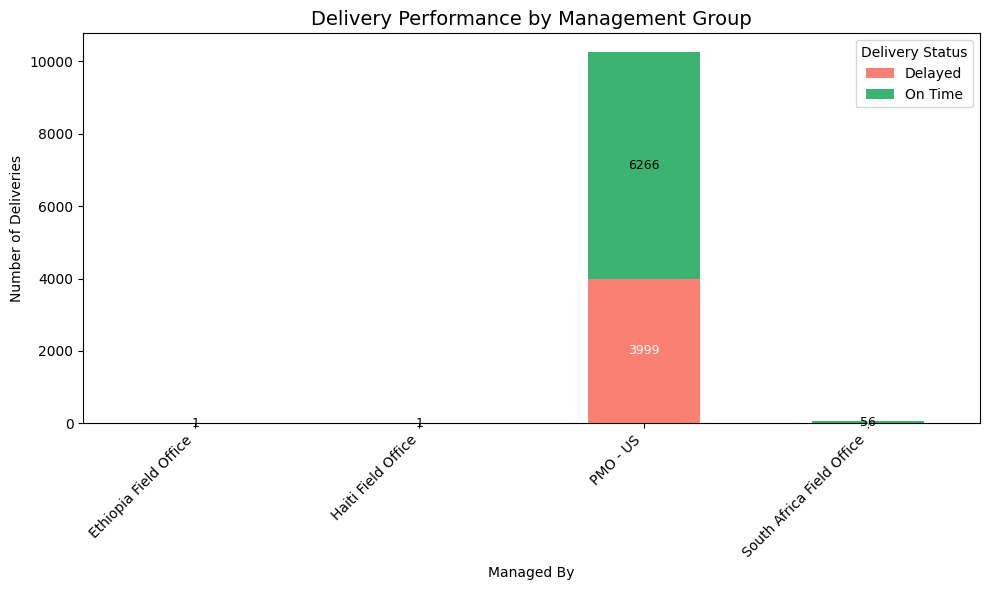

In [243]:
#Visualizing Delivery Performance by Management Group (with value labels)

import matplotlib.pyplot as plt
# Plot setup
ax = df_better_management.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['salmon', 'mediumseagreen']
)

# Title and labels
plt.title('Delivery Performance by Management Group', fontsize=14)
plt.xlabel('Managed By')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45, ha='right')
plt.legend(['Delayed', 'On Time'], title='Delivery Status')

# Add value labels on the bars
for i, row in enumerate(df_better_management.itertuples()):
    delayed = row[1]
    on_time = row[2]

    # Delayed label
    if delayed > 0:
        ax.text(i, delayed / 2, str(delayed), ha='center', va='center', color='white', fontsize=9)

    # On-time label
    if on_time > 0:
        ax.text(i, delayed + (on_time / 2), str(on_time), ha='center', va='center', color='black', fontsize=9)

# Layout fix
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **stacked bar chart** for visualizing delivery performance by management group because:

1. 📊 **Comparison Across Categories**: It clearly shows how each "Managed By" group performs in terms of both **on-time** and **delayed** deliveries.
2. 🧱 **Stacked View = Total Context**: By stacking on-time and delayed segments, we can also compare the **total volume of deliveries** per group.
3. 🎯 **Spot Proportions Easily**: The chart makes it easy to see which groups have a **higher ratio of on-time vs delayed** deliveries at a glance.
4. 🔢 **Label Support**: It's simple to add **text labels** to show the exact count, which helps in low-volume cases where the bars are too small.

Overall, this chart effectively combines **count** and **performance ratio** insights in one easy-to-read graphic.


##### 2. What is/are the insight(s) found from the chart?

PMO US office has the highest on-time and late deliveries, followed by South Africa field office. And only one delivery is done from Ethiopia and Haiti Field office. This implies FedEx mainly operates through PMO US office followed by South Africa field office.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

# ✅ Business Impact Analysis Based on Delivery Management Insights

# Positive Business Impact:
PMO US office has the highest number of both on-time and late deliveries,indicating it is the central hub for operations.
# This insight can help FedEx Logistics:
- Prioritize resources and optimization efforts at the PMO US office
- Analyze successful on-time deliveries to replicate best practices in other regions
- Enhance training or operational strategies for the South Africa Field Office, which also shows significant activity
- Use these insights for capacity planning and to strengthen partnerships or systems in high-performing locations

# Negative Growth Indicators:
Ethiopia and Haiti Field Offices show minimal activity (only 1 delivery each), which might imply:
- Under-utilized logistics infrastructure in those regions
- Potential barriers such as local regulation, customs issues, or limited demand
- If this minimal engagement is unintentional, it reflects poor network reach and could be a lost opportunity for market expansion

# Justification:
- These insights allow targeted operational improvements and strategic decision-making.
- Positive: Doubling down on efficient hubs can improve customer satisfaction and reduce cost.



#### Chart - 2

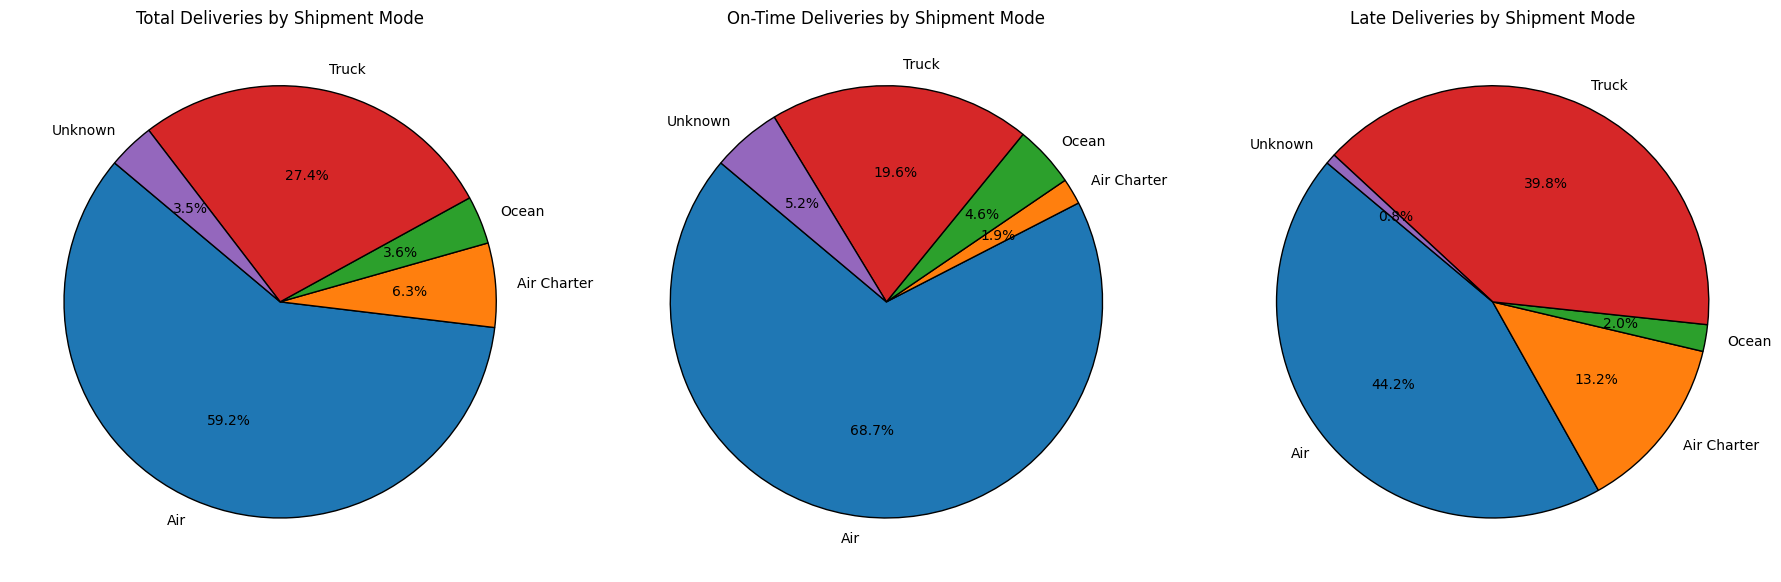

In [244]:
import matplotlib.pyplot as plt

# Recalculate the summary if not already done
df_shipment_influence = df.groupby(["Shipment Mode", "Delivery_on_time"]).size().unstack(fill_value=0)
df_shipment_influence.columns = ["Late Deliveries", "On-Time Deliveries"]
df_shipment_influence["Total Deliveries"] = df_shipment_influence["Late Deliveries"] + df_shipment_influence["On-Time Deliveries"]

# Define color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Prepare data
shipment_modes = df_shipment_influence.index
total = df_shipment_influence["Total Deliveries"]
on_time = df_shipment_influence["On-Time Deliveries"]
late = df_shipment_influence["Late Deliveries"]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Total Deliveries Pie
axs[0].pie(total, labels=shipment_modes, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
axs[0].set_title("Total Deliveries by Shipment Mode")

# On-Time Deliveries Pie
axs[1].pie(on_time, labels=shipment_modes, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
axs[1].set_title("On-Time Deliveries by Shipment Mode")

# Late Deliveries Pie
axs[2].pie(late, labels=shipment_modes, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
axs[2].set_title("Late Deliveries by Shipment Mode")

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

### 📊 Why Pie Charts Were Chosen for Shipment Mode Analysis

Pie charts are effective when we want to:

- 🔹 **Visualize proportions** of a whole — which is ideal when comparing shipment modes by delivery counts and performance.
- 🔹 **Provide quick visual insights** into which shipment modes dominate overall vs. which perform better in on-time delivery.
- 🔹 **Avoid clutter**, especially since we have a small number of shipment modes.

In this case, we display:
- **Total Deliveries by Shipment Mode** (left pie chart)
- **On-Time Deliveries by Shipment Mode** (right pie chart)

By placing the charts **side by side**, we can easily:
- Compare **usage volume** vs. **reliability** of each mode
- Identify if high-usage modes are also high-performing (or not)

📝 This approach helps in quickly identifying the **most efficient and reliable** delivery methods for decision-making.


##### 2. What is/are the insight(s) found from the chart?

### 📦 Shipment Mode Analysis

Most of the deliveries are done by **Air**, followed by **Truck**.  
This trend holds true across:

- ✅ **On-time Deliveries**
- ❌ **Late Deliveries**
- 📊 **Total Deliveries**

The three pie charts clearly suggest that **Air** is the most effective and preferred mode of transport for delivering packages, **succeeded by Truck**.

🚨 Notably, **Air Charter** appears to be the **least reliable** mode in terms of on-time delivery performance, indicating a potential area for improvement or review in the logistics strategy.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### 💡 Business Impact of Gained Insights

Yes, the insights gained from the analysis can help drive **positive business impact** in several ways:

- 🔍 **Performance Tracking**: Identifying that **Air** and **Truck** are the most effective and reliable shipment modes helps the organization focus its resources on what works best.
- 📉 **Cost and Risk Management**: Recognizing **Air Charter** as the least reliable allows the business to reassess its use, potentially avoiding delays and reducing associated costs.
- 🚚 **Strategic Planning**: Understanding delivery performance by shipment mode and region empowers better **logistics planning** and **vendor coordination**.
- ✅ **Client Satisfaction**: Improving on-time delivery rates can lead to **increased client trust and satisfaction**, ultimately benefiting the organization’s reputation and future contracts.


#### Chart - 3

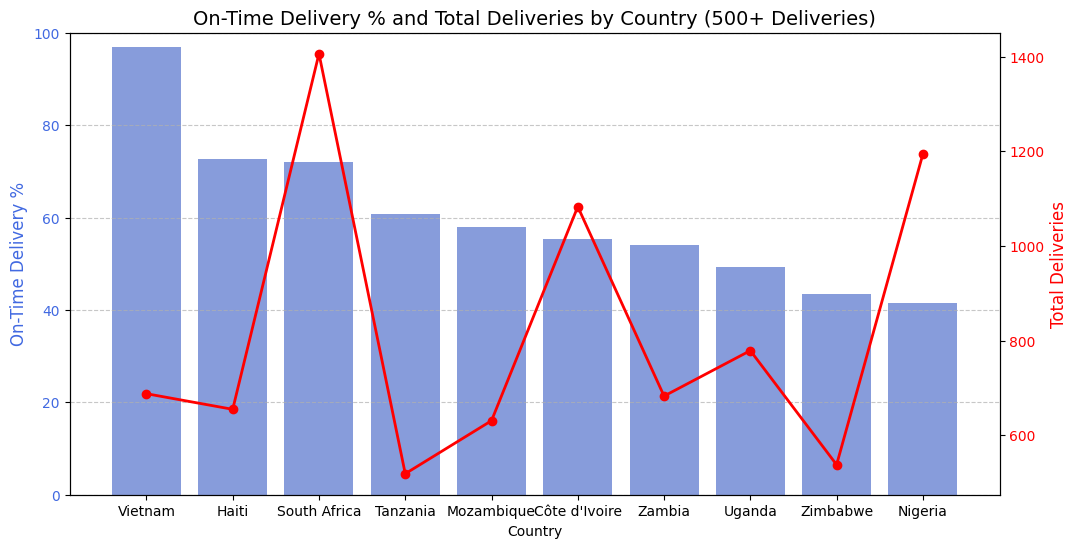

,Late Deliveries,On-Time Deliveries,On-Time Delivery %,Total Delivery
Country,,,,
Vietnam,22,666,96.802326,688
Haiti,179,476,72.671756,655
South Africa,393,1013,72.048364,1406
Tanzania,204,315,60.693642,519
Mozambique,265,366,58.003170,631
Côte d'Ivoire,483,600,55.401662,1083
Zambia,314,369,54.026354,683
Uganda,395,384,49.293967,779
Zimbabwe,304,234,43.494424,538


In [245]:
# Chart - 3 visualization code
df_country_influence = df.groupby(['Country','Delivery_on_time']).size().unstack(fill_value=0)
df_country_influence.columns = ['Late Deliveries','On-Time Deliveries']
df_country_influence['On-Time Delivery %'] = df_country_influence['On-Time Deliveries']/(df_country_influence['Late Deliveries']+df_country_influence['On-Time Deliveries'])*100
df_country_influence['Total Delivery'] = df_country_influence['Late Deliveries']+df_country_influence['On-Time Deliveries']
df_country_influence = df_country_influence.sort_values(by='Total Delivery',ascending=False)
# Filter countries with 500+ deliveries
df_filtered = df_country_influence[df_country_influence["Total Delivery"] > 500]

# Sort by On-Time Delivery %
df_filtered = df_filtered.sort_values(by="On-Time Delivery %", ascending=False)

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for On-Time Delivery % (Left Y-Axis)
sns.barplot(data=df_filtered, x=df_filtered.index, y="On-Time Delivery %", ax=ax1, color="royalblue", alpha=0.7)

# Customize left Y-axis
ax1.set_ylabel("On-Time Delivery %", color="royalblue", fontsize=12)
ax1.set_ylim(0, 100)  # On-Time % ranges from 0-100
ax1.set_xlabel("Country")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Step 5: Create a second Y-axis for Total Deliveries
ax2 = ax1.twinx()
ax2.plot(df_filtered.index, df_filtered["Total Delivery"], color="red", marker="o", linestyle="-", linewidth=2, label="Total Deliveries")

# Customize right Y-axis
ax2.set_ylabel("Total Deliveries", color="red", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

# Add a title and grid
plt.title("On-Time Delivery % and Total Deliveries by Country (500+ Deliveries)", fontsize=14)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
display(df_filtered)

### 📈 Why was this chart used?

This dual-axis chart (bar + line plot) was chosen to clearly illustrate two key metrics for each country:

- **Bar Plot (On-Time Delivery %):** Helps compare how punctual each country's deliveries are.
- **Line Plot (Total Deliveries):** Shows the total volume of deliveries per country.

By combining these two visuals:
- We can quickly identify countries that are both **efficient (high on-time %) and high-volume**.
- It provides a balanced view for performance and operational scale, enabling better strategic decisions.


##### 📌 2. What is/are the insight(s) found from the chart?

- **Country with highest total deliveries:** 🇿🇦 South Africa – 1,406 deliveries  
- **Country with highest On-Time Delivery %:** 🇻🇳 Vietnam – 96.8%

These insights suggest:
- **South Africa** has the highest customer base or operational volume.
- **Vietnam** is the most reliable in terms of timely deliveries, followed by **Haiti** and **South Africa**.
- This highlights Vietnam as a benchmark for delivery efficiency, while South Africa represents a key market for operations.


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### 📌 3. Will the gained insights help create a positive business impact?

Yes, the insights can significantly aid in driving positive business outcomes:

- **Resource Allocation:** Knowing that South Africa has the highest delivery volume allows businesses to allocate more logistics and operational resources there for improved efficiency.
- **Performance Benchmarking:** Vietnam’s high on-time delivery rate can be studied and replicated in other countries to improve overall service performance.
- **Strategic Planning:** Countries like Haiti and South Africa with both high volume and good performance can be targeted for service expansion and customer retention strategies.

---

##### ❗ Are there any insights that lead to negative growth?

Yes, some insights can highlight areas of concern:

- **Air Charter’s Poor Reliability:** The consistently low on-time delivery rate for **Air Charter** suggests inefficiencies. Relying on it may lead to customer dissatisfaction and potential revenue loss.
- **Countries with Low On-Time %:** Nations with large delivery volumes but low on-time performance may indicate bottlenecks, poor infrastructure, or process issues that need immediate attention to avoid negative customer impact.


#### Chart - 4


Mann-Whitney U Test: U-statistic = 959474.5000, p-value = 0.0372
🔴 Reject H₀: There is a significant difference in time differences between on-time and delayed deliveries.
Median Time Difference (On-Time): 92.00 days
Median Time Difference (Delayed): 95.00 days
Mean Time Difference between PO sent to the vendor date and scheduled delivery date(On-Time delivery): 105.60 days
Mean Time Difference between PO sent to the vendor date and scheduled delivery date(Late Delivery): 106.91 days


<ipython-input-246-85c0568fcb27>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy["Delivery_on_time"], y=df_copy["Time_Difference"], palette=["red", "green"])


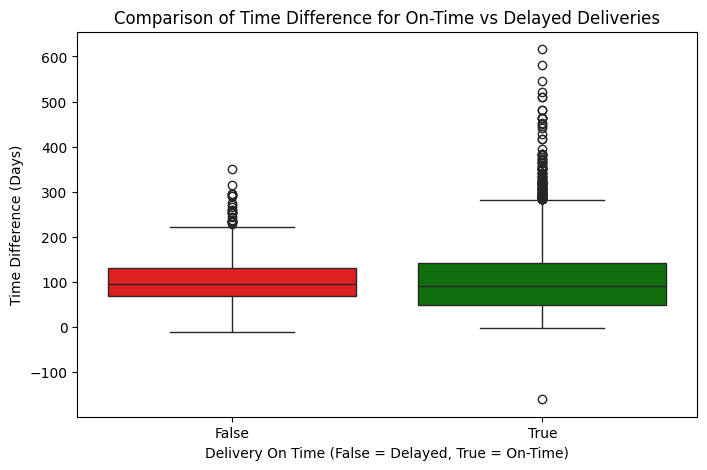

In [246]:
# Chart - 4 visualization code
df_copy = df.copy()
df_copy["Time_Difference"] = df_copy["Scheduled Delivery Date"] - df_copy["PO Sent to Vendor Date"]
df_copy["Time_Difference"] = df_copy["Time_Difference"].dt.days
df_copy_grouped = df_copy.groupby(['Country','Delivery_on_time'])['Time_Difference'].mean().unstack()
df_copy_grouped.columns = [['Avg_Time_Difference_Late_Deliveries','Average_Time_Difference_On_Time_Deliveries']]
df_copy_grouped = df_copy_grouped.dropna()

df_copy_h_testing = df_copy.copy()
df_copy_h_testing = df_copy_h_testing.dropna(subset=['Time_Difference'])
on_time = df_copy_h_testing[df_copy_h_testing["Delivery_on_time"] == True]["Time_Difference"]
delayed = df_copy_h_testing[df_copy_h_testing["Delivery_on_time"] == False]["Time_Difference"]
import scipy.stats as stats

# Perform Mann-Whitney U Test
u_stat, p_u = stats.mannwhitneyu(on_time, delayed, alternative="two-sided")

print(f"\nMann-Whitney U Test: U-statistic = {u_stat:.4f}, p-value = {p_u:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_u < alpha:
    print("🔴 Reject H₀: There is a significant difference in time differences between on-time and delayed deliveries.")
else:
    print("🟢 Fail to Reject H₀: No significant difference.")
# Calculate median for each group
median_on_time = np.median(on_time)
median_delayed = np.median(delayed)

print(f"Median Time Difference (On-Time): {median_on_time:.2f} days")
print(f"Median Time Difference (Delayed): {median_delayed:.2f} days")

# Compare mean as well
mean_on_time = np.mean(on_time)
mean_delayed = np.mean(delayed)

print(f"Mean Time Difference between PO sent to the vendor date and scheduled delivery date(On-Time delivery): {mean_on_time:.2f} days")
print(f"Mean Time Difference between PO sent to the vendor date and scheduled delivery date(Late Delivery): {mean_delayed:.2f} days")
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy["Delivery_on_time"], y=df_copy["Time_Difference"], palette=["red", "green"])

plt.xlabel("Delivery On Time (False = Delayed, True = On-Time)")
plt.ylabel("Time Difference (Days)")
plt.title("Comparison of Time Difference for On-Time vs Delayed Deliveries")
plt.show()

### 📌 Why did you pick the specific chart?



The **box plot** was chosen because it is effective in:

- 📏 **Comparing distributions** of time differences for two categorical outcomes (On-Time vs Delayed).
- 🎯 **Highlighting medians** and **spread (IQR)** to understand variability.
- 🧭 Easily detecting **outliers**, which may impact delivery performance.

This chart provides a **clear visual contrast** between on-time and delayed shipments, aligning well with the statistical test results and helping interpret operational efficiency.


##### 2. What is/are the insight(s) found from the chart?

Even slight differences in the time between **PO sent** and **scheduled delivery date** impact whether a shipment is delivered on time.  
Shorter and more optimized lead times tend to result in **higher on-time delivery rates**.

📌 This insight can guide procurement and logistics teams to fine-tune planning windows and improve service levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Correlation: 0.6172


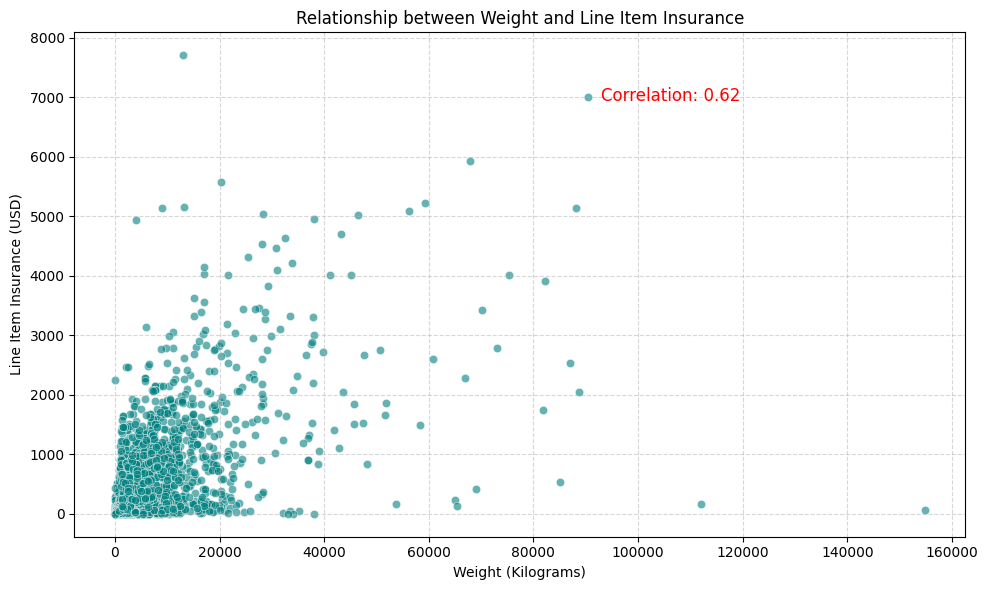

In [250]:
# Chart - 5: Scatter Plot to visualize correlation between Weight and Line Item Insurance

import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_copy_weight = df_copy.dropna(subset=["Weight (Kilograms)", "Line Item Insurance (USD)"])

# Calculate correlation
correlation = df_copy_weight["Weight (Kilograms)"].corr(df_copy_weight["Line Item Insurance (USD)"])
print(f"Correlation: {correlation:.4f}")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy_weight, x="Weight (Kilograms)", y="Line Item Insurance (USD)", alpha=0.6, color="teal")
plt.title("Relationship between Weight and Line Item Insurance")
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Line Item Insurance (USD)")

# Show correlation on plot
plt.text(x=max(df_copy_weight["Weight (Kilograms)"])*0.6,
         y=max(df_copy_weight["Line Item Insurance (USD)"])*0.9,
         s=f"Correlation: {correlation:.2f}", fontsize=12, color='red')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **scatter plot** is ideal for visualizing the relationship between two continuous numerical variables — in this case, **Weight (Kilograms)** and **Line Item Insurance (USD)**. It allows us to easily observe correlation, patterns, or potential outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

The correlation between weight and line item insurance is **0.62**, which indicates a **moderate positive relationship**. This means that, generally, as the weight of a shipment increases, the insurance value also increases — suggesting a logical connection where heavier shipments tend to be more valuable and hence insured more.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight allows the business to:
- **Better assess risk** and set appropriate insurance premiums based on shipment weight.
- **Predict insurance costs** more accurately during planning.
- **Identify anomalies** where insurance doesn't align with shipment weight, potentially pointing to under- or over-insured shipments.

#### Chart - 6

<ipython-input-253-07b13cb201c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_term_performance_dropped["On_time_delivery %"] = (
<ipython-input-253-07b13cb201c2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


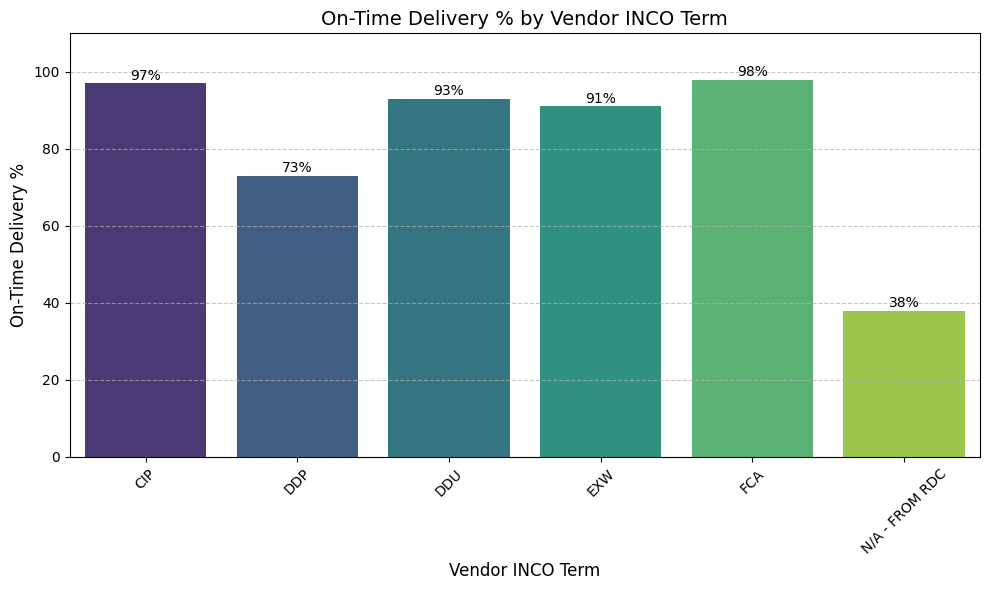

In [253]:
# Chart - 6 visualization code

# Group by 'Vendor INCO Term' and 'Delivery_on_time' to analyze performance
df_term_performance = df_copy.groupby(['Vendor INCO Term', 'Delivery_on_time']).size().unstack(fill_value=0)

# Rename columns for clarity
df_term_performance.columns = ['Late_Delivery', 'On_time_delivery']

# Drop terms with 0 Late Deliveries (optional depending on your goal)
df_term_performance_dropped = df_term_performance[df_term_performance['Late_Delivery'] > 0]

# Calculate On-time delivery percentage
df_term_performance_dropped["On_time_delivery %"] = (
    df_term_performance_dropped["On_time_delivery"] /
    (df_term_performance_dropped["Late_Delivery"] + df_term_performance_dropped["On_time_delivery"]) * 100
).round(0).astype(int)

# Display the final DataFrame
df_term_performance_dropped
# Bar chart for On-time Delivery % by Vendor INCO Term

plt.figure(figsize=(10, 6))
sns.barplot(
    x=df_term_performance_dropped.index,
    y="On_time_delivery %",
    data=df_term_performance_dropped,
    palette="viridis"
)

# Annotate bars with percentage values
for index, value in enumerate(df_term_performance_dropped["On_time_delivery %"]):
    plt.text(index, value + 1, f'{value}%', ha='center', fontsize=10)

plt.title("On-Time Delivery % by Vendor INCO Term", fontsize=14)
plt.xlabel("Vendor INCO Term", fontsize=12)
plt.ylabel("On-Time Delivery %", fontsize=12)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The **bar chart** was chosen because it clearly represents the comparison of On-Time Delivery percentages across different **Vendor INCO Terms**. It makes it easy to observe which terms are associated with higher or lower delivery reliability.


##### 2. What is/are the insight(s) found from the chart?

- Certain INCO terms show significantly higher on-time delivery rates.
- For instance, terms like **DDP** has the lowest performance among all.
- This insight can help in understanding which INCO agreements are more reliable for timely deliveries.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By identifying which INCO terms are linked with higher on-time deliveries, businesses can negotiate contracts accordingly. This can lead to better customer satisfaction and improved supply chain efficiency.  
There may be a **negative insight** as well—certain INCO terms might consistently show **lower performance**, indicating a need for review or renegotiation of those terms with vendors.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### ✅ Overall Solution to the Business Objective

The analysis of the SCMS Delivery History dataset helped identify key patterns and actionable insights related to delivery performance. Below is a summary of the solution:

- 📦 **Shipment Mode Optimization**: Air transport is the most frequently used and the most effective in terms of on-time delivery, followed by Truck. However, Air Charter showed poor reliability and may need further investigation or reduced usage.
  
- 🌍 **Country-Level Performance**: Countries like **Vietnam, Haiti, and South Africa** show high on-time delivery rates, with South Africa also handling the highest number of shipments. These insights help prioritize reliable regions and highlight countries that may need process improvements.

- 📊 **Vendor INCO Term Influence**: Certain INCO terms are associated with significantly higher on-time delivery percentages. Leveraging these terms in contracts can improve logistics performance.

- ⏱️ **Time Difference Impact**: Deliveries completed on time tend to have a slightly shorter time window between PO sent and scheduled delivery. While the difference is subtle, it's statistically significant and could be optimized further.

- ⚖️ **Weight vs Insurance Correlation**: A moderate positive correlation (0.6) exists between shipment weight and insurance cost, which may help with pricing models and risk management.

### 📈 Business Impact:
- These insights help streamline logistics operations, renegotiate better shipping terms, and target underperforming regions or methods.
- By improving on-time delivery performance, customer satisfaction can be enhanced and operational costs minimized.
Answer Here.

# **Conclusion**

### 🔚 Conclusion

The analysis of the SCMS Delivery History dataset reveals several key insights that can significantly enhance the supply chain process. By identifying top-performing shipment modes, reliable countries, and efficient vendor terms, the organization can make data-driven decisions to improve delivery performance.

The consistent performance of Air and Truck shipping, the reliability of certain countries like Vietnam and South Africa, and the impact of INCO terms on delivery timing all point to actionable areas for process optimization. Additionally, the statistical validation of time difference impact reinforces the importance of lead time management.

These insights not only highlight current strengths but also uncover areas needing improvement—like the poor reliability of Air Charter. Strategic adjustments based on this analysis can lead to increased efficiency, cost savings, and improved client satisfaction.
Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!!***